#Multisystem Inflammatory Syndrome in Children (MIS-C)

Multisystem inflammatory syndrome in children (MIS-C), also known as pediatric inflammatory multisystem syndrome, is a new dangerous childhood disease that is temporally associated with coronavirus disease 2019 (COVID-19). The review aimed to describe the typical presentation and outcomes of children diagnosed with this hyperinflammatory condition.

![](https://www.mdpi.com/children/children-07-00069/article_deploy/html/images/children-07-00069-g001-550.jpg)https://www.mdpi.com/2227-9067/7/7/69

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cusersmarildownloadsmiscpdf/misC.pdf


In [ ]:
# Import Python Packages
# PyTesseract and Tika-Python for OCR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import PIL
import os
from os import walk
from shutil import copytree, ignore_patterns
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from wand.image import Image as Img
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
#mueller_report = pd.read_csv('../input/data-science-cheat-sheets/Interview Questions/AI Questions.pdf') # one row per line

In [ ]:
# Define helper function for plotting word clouds
def wordCloudFunction(df,column,numWords):
    # adapted from https://www.kaggle.com/benhamner/most-common-forum-topic-words
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    word_string=str(popular_words_nonstop)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=numWords,
                          width=1000,height=1000,
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [ ]:
# Define helper function for plotting word bar graphs
def wordBarGraphFunction(df,column,title):
    # adapted from https://www.kaggle.com/benhamner/most-common-forum-topic-words
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

In [ ]:
# Preview the data folder
inputFolder = '../input/'
for root, directories, filenames in os.walk(inputFolder):
    for filename in filenames: 
        print(os.path.join(root,filename))
        
# Move data to folder with read/write access
outputFolder = '/kaggle/working/pdfs/'
shutil.copytree(inputFolder,outputFolder,ignore=ignore_patterns('*.db'))
for root, directories, filenames in os.walk(outputFolder, topdown=False):
    for file in filenames:
        try:
            shutil.move(os.path.join(root, file), outputFolder)
        except OSError:
            pass
print(os.listdir(outputFolder))

../input/cusersmarildownloadsmiscpdf/misC.pdf
['cusersmarildownloadsmiscpdf', 'misC.pdf']


In [ ]:
# Look at page 11
pdf = os.path.join(outputFolder,'misC.pdf[11]')
with Img(filename=pdf, resolution=300) as img:
    img.compression_quality = 99
    img.convert("RGBA").save(filename='/kaggle/working/misC.jpg') # intro page to preview later

#PDF to CSV

Convert Page 3 of PDF to CSV (Method 1 of 2: PyTesseract)

In [ ]:
# Parse a PDF file and convert it to CSV using PyTesseract
import pytesseract
pdfimage = Image.open('/kaggle/working/misC.jpg')
text = pytesseract.image_to_string(pdfimage)  
df = pd.DataFrame([text.split('\n')])

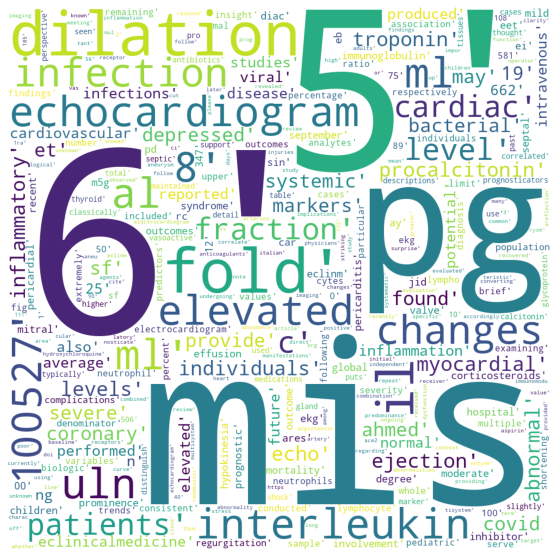

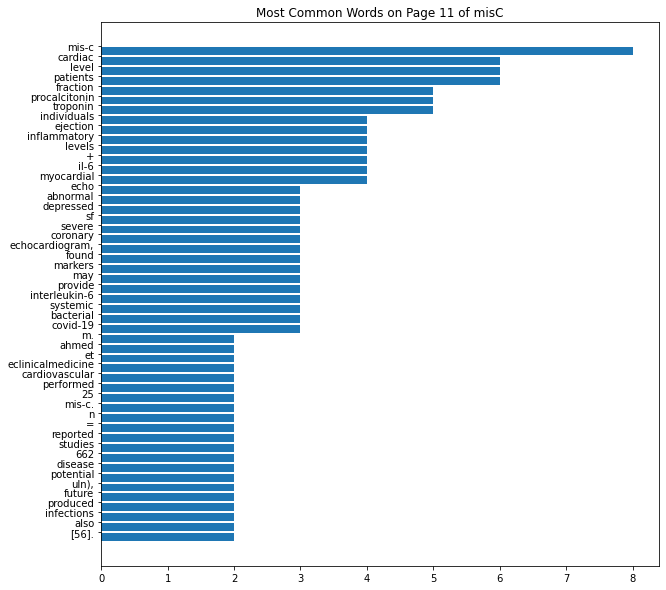

In [ ]:
# Plot WordCloud of page 11
plt.figure(figsize=(10,10))
wordCloudFunction(df.T,0,10000000)
plt.figure(figsize=(10,10))
wordBarGraphFunction(df.T,0,"Most Common Words on Page 11 of misC")

In [ ]:
# Parse a PDF file and convert it to CSV using Tika-Python
!pip install tika
import tika
from tika import parser
tika.initVM()
parsed = parser.from_file('/kaggle/working/misC.jpg') 
text = parsed["content"]
df = pd.DataFrame([text.split('\n')])
df.drop(df.iloc[:, 1:46], inplace=True, axis=1)

  Created wheel for tika: filename=tika-1.24-py3-none-any.whl size=32884 sha256=0e698dbefd4b446c74a79c78cf75bdf679bd5ceccd95367c6efa2760be0b035b
  Stored in directory: /root/.cache/pip/wheels/ec/2b/38/58ff05467a742e32f67f5d0de048fa046e764e2fbb25ac93f3
Successfully built tika
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


2020-09-14 22:29:31,177 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2020-09-14 22:29:36,737 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2020-09-14 22:29:37,805 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [ ]:
# Convert PDF to JPG and then convert JPG to CSV
# I will do this for Pages 1 to 16 but
# Eventually I should loop through the entire document

# PDF to JPG for p11
pdf = os.path.join(outputFolder,'misC.pdf[11]')
with Img(filename=pdf, resolution=300) as img:
    img.compression_quality = 99
    img.convert("RGBA").save(filename='/kaggle/working/misC.jpg')
pdfimage11 = Image.open('/kaggle/working/misC.jpg')

In [ ]:
# PDF to JPG for p14
pdf = os.path.join(outputFolder,'misC.pdf[14]')
with Img(filename=pdf, resolution=300) as img:
    img.compression_quality = 99
    img.convert("RGBA").save(filename='/kaggle/working/misC.jpg')
pdfimage14 = Image.open('/kaggle/working/misC.jpg')

# PDF to JPG for p12
pdf = os.path.join(outputFolder,'misC.pdf[12]')
with Img(filename=pdf, resolution=300) as img:
    img.compression_quality = 99
    img.convert("RGBA").save(filename='/kaggle/working/misC.jpg')
pdfimage12 = Image.open('/kaggle/working/misC.jpg')

In [ ]:
# Parse a PDF file and convert it to CSV using PyTesseract (p11)
text = pytesseract.image_to_string(pdfimage11)
df = pd.DataFrame([text.split('\n')])
df.drop(df.iloc[:, 27:], inplace=True, axis=1)
df.drop(df.iloc[:, :3], inplace=True, axis=1)
df.columns = range(df.shape[1])

In [ ]:
# Parse a PDF file and convert it to CSV using Tika-Python (p1-16)
tika.initVM()
parsed = parser.from_file('/kaggle/working/misC.jpg')
parsed2 = parser.from_file('/kaggle/working/misC.jpg')

text = parsed["content"]
df2 = pd.DataFrame([text.split('\n')])
df2.drop(df2.iloc[:, 1:50], inplace=True, axis=1)
df2.drop(df2.iloc[:, 26:], inplace=True, axis=1)
df2.columns = range(df2.shape[1])

text = parsed2["content"]
df3 = pd.DataFrame([text.split('\n')])
df3.drop(df3.iloc[:, :50], inplace=True, axis=1)
df3.drop(df3.iloc[:, 22:], inplace=True, axis=1)
df3.columns = range(df3.shape[1])

dfcombined = pd.concat([df, df2, df3]) # combine pages 1-16

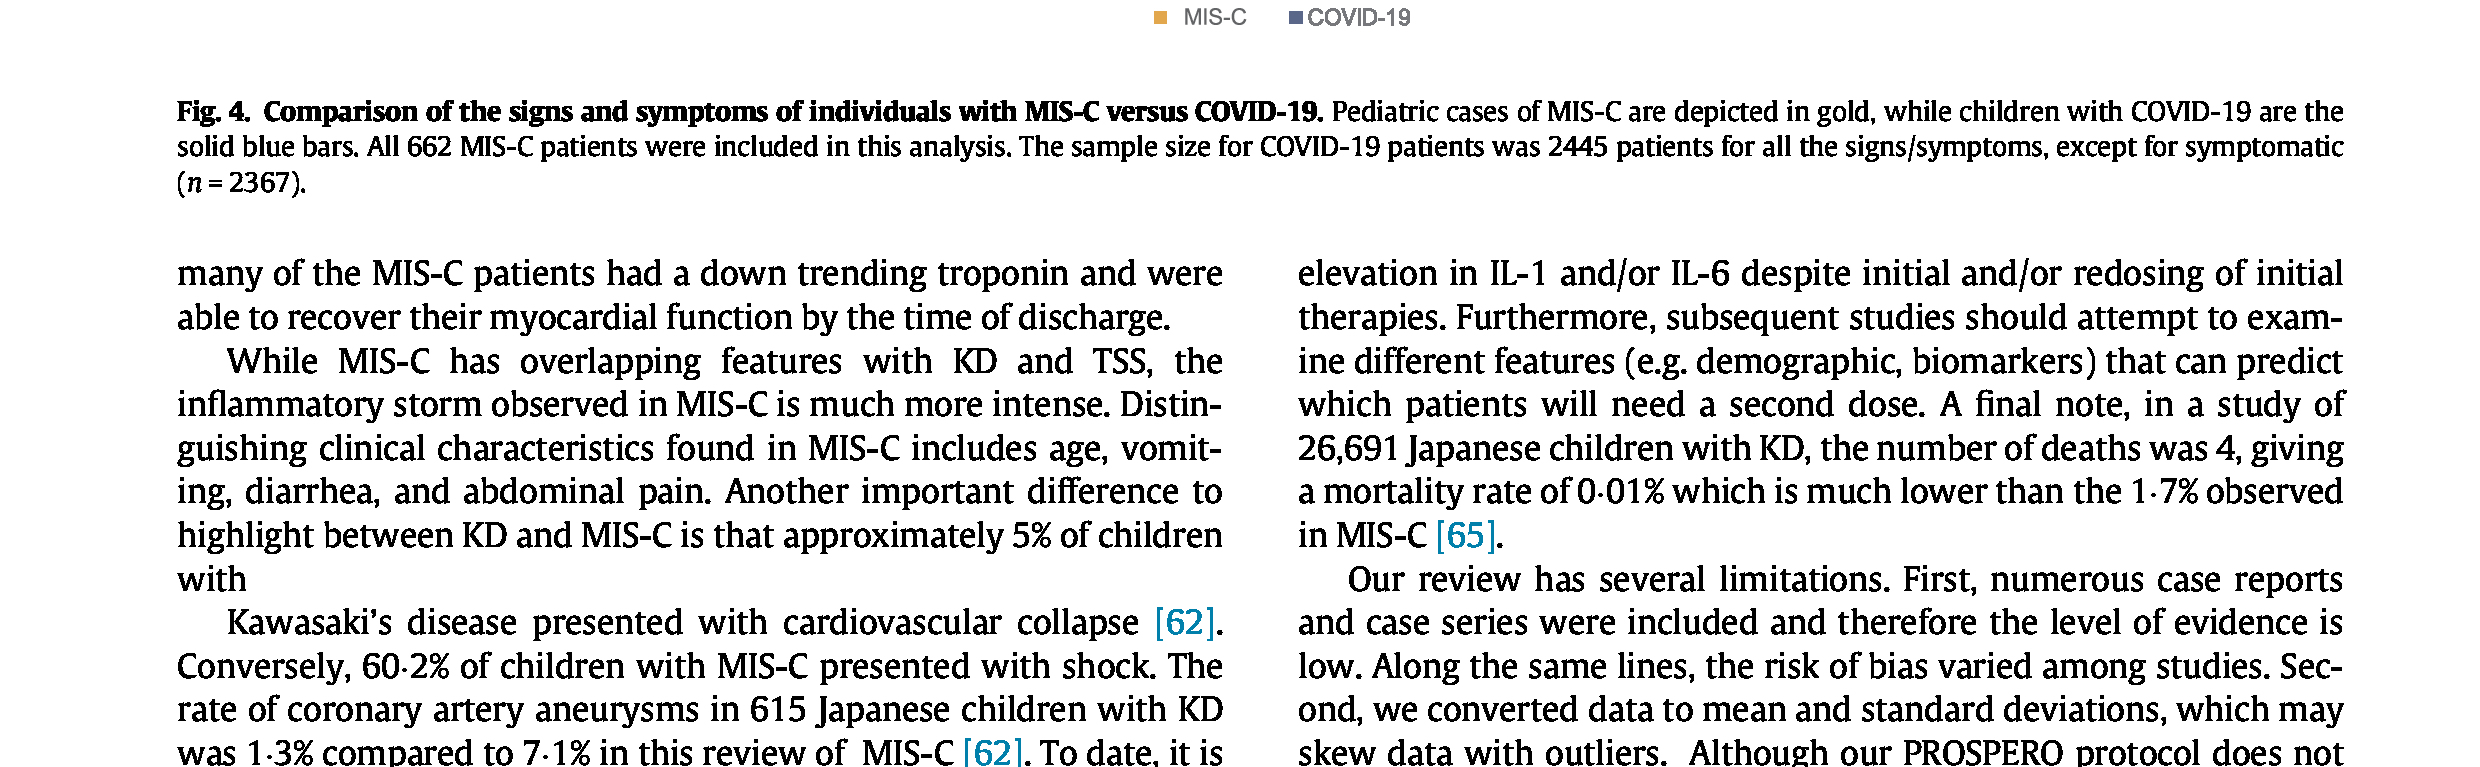

In [ ]:
#Explore page 3 - Mueller Report. Here I don't know how many pages each Cheat Sheet. There are 30 pages 
w, h = pdfimage12.size # crop image
pdfimage12.crop((0, 1240, w, h-1300)) # display exerpt of PDF

In [ ]:
# Convert PDF to JPG and then convert JPG to CSV
# I will do this for Pages 1 to 16 but
# Eventually I should loop through the entire document

# PDF to JPG for p11
pdf = os.path.join(outputFolder,'misC.pdf[11]')
with Img(filename=pdf, resolution=300) as img:
    img.compression_quality = 99
    img.convert("RGBA").save(filename='/kaggle/working/misC.jpg')
pdfimage11 = Image.open('/kaggle/working/misC.jpg')

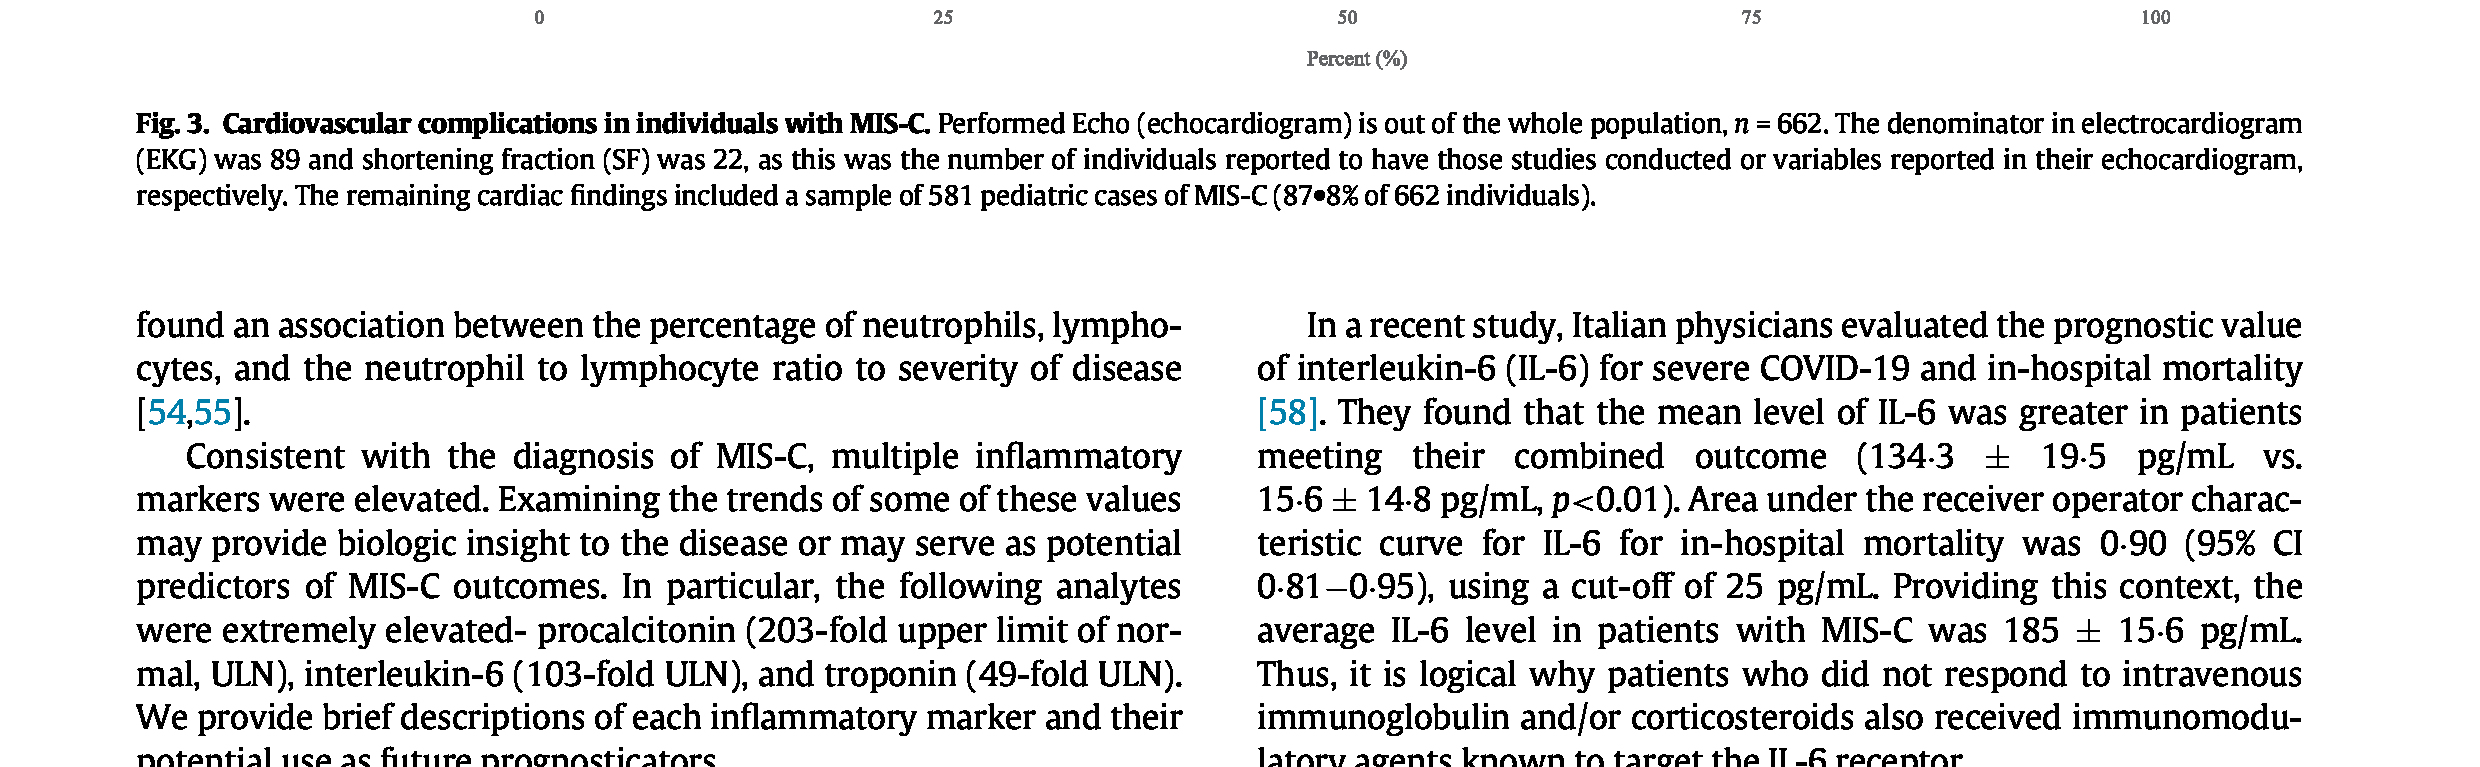

In [ ]:
#Explore page 3 - Mueller Report. Here I don't know how many pages each Cheat Sheet. There are 30 pages 
w, h = pdfimage11.size # crop image
pdfimage11.crop((0, 1240, w, h-1300)) # display exerpt of PDF

In [ ]:
# Pages 11, 12 and 14
dfcombined.head() # preview csv of 1-16

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,,oa,,ke tee emcee),,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,,,M. Ahmed et al. / EClinicalMedicine 00 (2020) 100527 13,,Signs and Symptoms in MIS-C vs. COVID-19,,100,,QD,o,,% of cases,,&,o,,NO,Oo,,Symptomatic Fever Diarrhea,,m= MIS-C,,0 | |,,Vomit Cough Rhinorrhea
0,,M. Ahmed et al. / EClinicalMedicine 00 (2020) 100527 13,,Signs and Symptoms in MIS-C vs. COVID-19,,100,,QD,o,,% of cases,,&,o,,NO,Oo,,Symptomatic Fever Diarrhea,,m= MIS-C,,NaN,NaN,NaN,NaN


In [ ]:
# Clean up the notebook
!apt-get install zip # install zip
!zip -r pdfs.zip /kaggle/working/pdfs/ # zip up a few files
!rm -rf pdfs/* # remove everything else




zip is already the newest version (3.0-11build1).
0 upgraded, 0 newly installed, 0 to remove and 76 not upgraded.
  adding: kaggle/working/pdfs/ (stored 0%)
  adding: kaggle/working/pdfs/cusersmarildownloadsmiscpdf/ (stored 0%)
  adding: kaggle/working/pdfs/misC.pdf (deflated 24%)


Das War's, Kaggle Notebook Runner: Marília Prata  @mpwolke